# 计算机视觉纳米学位项目

## 实战项目：图像标注

---

在这个notebook中，你要做的是训练你的CNN-RNN模型。

我们欢迎并鼓励你在搜索好的模型时尝试多种不同的架构和超参数。

这样的话，很有可能会使项目变得非常凌乱！所以，在提交项目之前，请确保清理以下内容：
- 你在这个notebook上写的代码。该notebook应描述如何训练单个CNN-RNN架构，使其与你最终选择的超参数相对应。此外，你的notebook应便于审阅专家通过运行此notebook中的代码来复制结果。
- **Step 2**中代码单元格的输出。这个输出显示的应该是从零开始训练模型时获得的输出。

我们将会对这个notebook**进行评分**。

你可以通过点击以下链接导航到该notebook：
- [Step 1](#step1): 训练设置
- [Step 2](#step2): 训练你的模型
- [Step 3](#step3): (可选）验证你的模型

<a id='step1'></a>
## Step 1: 训练设置

在该notebook的此步骤中，你需要通过定义超参数并设置训练过程中重要的其他选项来自定义对CNN-RNN模型的训练。在下面的**Step 2**中训练模型时，会使用到现在设置的值。

请注意，你只可以修改以`TODO`语句开头的代码块。**对于所以不在`TODO`语句之前的代码块，不能做任何修改。**

### 任务 #1

首先，请设置以下变量：
- `batch_size` - 每个训练批次的批次大小。它是指用于在每个训练步骤中修改模型权重的图像标注对的数量。
- `vocab_threshold` - 单词阈值最小值。请注意，阈值越大，词汇量越小，而阈值越小，则表示将包括较少的词汇，词汇量则越大。
- `vocab_from_file` - 一个布尔值，用于决定是否从文件加载词汇表。
- `embed_size` - the dimensionality of the image and word embeddings.  图像和单词嵌入的维度。
- `hidden_size` - RNN解码器隐藏状态下的特征数。
- `num_epochs` - 训练模型的epoch数。我们建议你设置为`num_epochs=3`，但可以根据需要随意增加或减少此数字。 [这篇论文](https://arxiv.org/pdf/1502.03044.pdf) 在一个最先进的GPU上对一个标注生成模型训练了3天，但很快你就会发现，其实在几个小时内就可以得到合理的结果！（_但是，如果你想让你的模型与当前的研究一较高下，则需要更长时间的训练。_)
- `save_every` - 确定保存模型权重的频率。我们建议你设置为`save_every=1`，便于在每个epoch后保存模型权重。这样，在第`i`个epoch之后，编码器和解码器权重将在`models/`文件夹中分别保存为`encoder-i.pkl`和`decoder-i.pkl`。
- `print_every` - 确定在训练时将批次损失输出到Jupyter notebook的频率。请注意，训练时，你**将不会**看到损失函数的单调减少，这一点非常好并且完全可以预料到！我们建议你将其保持在默认值`100` ，从而避免让这个notebook运行变慢，但之后随时都可以进行更改。
- `log_file` - 包含每个步骤中训练期间的损失与复杂度演变过程的的文本文件的名称。

对于上述某些值，如果你不确定从哪里开始设置，可以仔细阅读 [这篇文章](https://arxiv.org/pdf/1502.03044.pdf) 与 [这篇文章](https://arxiv.org/pdf/1411.4555.pdf) ，获得有用的指导！为了避免在该notebook上花费太长时间，我们建议你查阅这些研究论文，从中可以获得有关哪些超参数可能最有效的初始猜测。然后，训练单个模型，然后继续下一个notebook（**3_Inference.ipynb**）。如果你对模型的效果不满意，可以返回此notebook调整超参数和/或**model.py**中的体系结构，并重新训练模型。

### 问题1

**问题:** 详细描述你的CNN-RNN架构。对于这种架构，任务1中变量的值，你是如何选择的？如果你查阅了某一篇详细说明关于成功实现图像标注生成模型的研究论文，请提供该参考论文。

**答案:** 
1. `batch_size`，首先设置成一个较小的值，观察整体的损失曲线变化，通常越小，曲线震荡越厉害，要使曲线变化平滑，需要增大该值；
2. `embed_size`、`hidden_size`，这两个值直接影响模型的复杂度，越大复杂度越高，可能会导致过拟合；
3. `num_epochs`，影响最终模型的拟合程度，实验从较小的值开始，如果较小的值不能够使损失下降到接近稳定变化的趋势，就需要加大，而如果在较小值情况下，就已经使损失快速下降后呈现微小下降的趋势，那么可以尝试调试其它超参数；
4. `vocab_threshold`，选定较小的值，可以保证模型能够预测到更多的单词，而非`unknown word`；
5. `vocab_from_file`，在第一次生成之后，就不再更改。


### （可选）任务 #2

请注意，我们为你推荐了一个用于预处理训练图像的图像转换`transform_train`，但同时，也欢迎并鼓励你根据需要进行修改。修改此转换时，请牢记：
- 数据集中的图像具有不同的高度和宽度
- 如果使用预先训练的模型，则必须执行相应的相应归一化。

### 问题2

**问题:** 你是如何在`transform_train`中选择转换方式的？如果你将转换保留为其提供的值，为什么你的任务它非常适合你的CNN架构？

**答案:** 
1. CNN模型的输入需要是固定大小的值，因此需要将数据转换成一致的尺寸；
2. 在输入数据中，加入随机的裁剪、镜像、缩放，可以有效防止过拟合；
3. 将输入数据进行归一化，可以使模型更快收敛到最优解。

### 任务 #3

接下来，你需要定义一个包含模型的可学习参数的Python列表。 例如，如果你决定使解码器中的所有权重都是可训练的，但只想在编码器的嵌入层中训练权重，那么，就应该将`params`设置为：

```python
params = list(decoder.parameters()) + list(encoder.embed.parameters()) 
```

### 问题3

**问题:** 你是如何选择该架构的可训练参数的？ 为什么你认为这是一个不错的选择？

**答案:** 模型的encoder部分是预训练的的CNN模型，用于提取图像特征向量，因此除了最后加入的Embed层之外，都不需要经过训练。CNN层最后的Embed层按照当前的特定任务，需要进行训练；而RNN部分是识别序列的重要部分，没有经过预训练，必然是需要设置成可训练模式的。

### 任务 #4

最后，选择一个 [优化程序](http://pytorch.org/docs/master/optim.html#torch.optim.Optimizer)。

### 问题4

**问题:** 你是如何选择用于训练模型的优化程序的？

**答案:**相比SGD、RMSprop等，Adam优化器收敛速度更加快。

In [0]:
import torch
import torch.nn as nn
from torchvision import transforms
import os
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO
from data_loader import get_loader
import math
import torch.optim as optim

# batch_size = 64          # batch size
# vocab_threshold = 10        # minimum word count threshold
# vocab_from_file = True    # if True, load existing vocab file
# embed_size = 256           # dimensionality of image and word embeddings
# hidden_size = 64          # number of features in hidden state of the RNN decoder
# num_epochs = 3             # number of training epochs
# save_every = 1             # determines frequency of saving model weights
# print_every = 100          # determines window for printing average loss
# log_file = 'training_log.txt'       # name of file with saved training loss and perplexity

In [0]:
## TODO #1: Select appropriate values for the Python variables below.

#@title Hyper parameter {run: "auto"}
batch_size = 128 #@param {type:"integer"}
vocab_threshold = 5 #@param {type:"integer"}
vocab_from_file = True #@param {type:"boolean"}
embed_size = 512 #@param {type:"integer"}
hidden_size = 512 #@param {type:"integer"}
num_layers = 1 #@param {type:"integer"}
num_epochs = 3 #@param {type:"integer"}
learning_rate = 0.001 #@param {type:"number"}
save_every = 1 #@param {type:"integer"}
print_every = 100 #@param {type:"integer"}
log_file = 'training_log.txt' #@param {type:"string"}
save_root_path = "/content/gdrive/My Drive/AI-projects/cv-project1-image-caption/" #@param {type:"string"}


In [3]:
# (Optional) TODO #2: Amend the image transform below.
transform_train = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

# Build data loader.
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=vocab_from_file)

Vocabulary successfully loaded from vocab.pkl file!
loading annotations into memory...
Done (t=0.74s)
creating index...


  0%|          | 700/414113 [00:00<00:59, 6998.30it/s]

index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [00:49<00:00, 8342.98it/s]


In [4]:
from model import EncoderCNN, DecoderRNN

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder. 
encoder = EncoderCNN(embed_size)
decoder = DecoderRNN(embed_size, hidden_size, vocab_size, num_layers)

# Move models to GPU if CUDA is available. 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder.to(device)
decoder.to(device)

# Define the loss function. 
criterion = nn.CrossEntropyLoss().cuda() if torch.cuda.is_available() else nn.CrossEntropyLoss()
# TODO #3: Specify the learnable parameters of the model.
params = list(encoder.embed.parameters()) + list(decoder.parameters())

# TODO #4: Define the optimizer.
optimizer = optim.Adam(params, lr=learning_rate)

# Set the total number of training steps per epoch.
total_step = math.ceil(len(data_loader.dataset.caption_lengths) / data_loader.batch_sampler.batch_size)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 97179859.78it/s]


<a id='step2'></a>
## Step 2: 训练你的模型

在**Step 1**中执行代码单元格后，下面的训练过程应该就不会出现问题了。

在这里，完全可以将代码单元格保留其原样，无需修改即可训练模型。但是，如果要修改用于训练下面模型的代码，则必须确保审阅专家能够很容易地看明白你的更改内容。换句话说，请务必提供适当的注释来描述代码的工作方式！

你可能会发现，使用加载已保存的权重来恢复训练很有用。在这种情况下，请注意包含你要加载的编码器和解码器权重的文件的名称（`encoder_file`和`decoder_file`）。之后，你就可以使用下面的代码行加载权重：

```python
# Load pre-trained weights before resuming training.
encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))
```

在试验参数时，请务必记录大量笔记并记录你在各种训练中使用的设置。特别是，你不希望遇到这样的情况，即已经训练了几个小时的模型，但不记得使用的设置:)。

### 关于调整超参数的说明

为了弄清楚模型的运行情况，你可以尝试去了解训练过程中训练损失和复杂度是如何演变的。为了做好本项目，我们建议你根据这些信息修改超参数。

但是，这样你还是无法知道模型是否过度拟合训练数据，但你要知道的是，过度拟合是训练图像标注模型时常会遇到的问题。

对于这个项目，你不必担心过度拟合。**该项目对模型的性能没有严格的要求**，你只需要证明你的模型在生成基于测试数据的标注时学到了**_一些东西_**。现在，我们强烈建议你为我们建议的3个epoch训练你的模型，但不必担心性能；然后，立即转换到下一个notebook（**3_Inference.ipynb**），查看模型对测试数据的执行情况。如果你的模型需要更改，可以回到这个notebook，修改超参数（如有必要的话），并重新训练该模型。

也就是说，如果你想在这个项目中有所超越，可以阅读 [本文](http://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=7505636)4.3.1节中最小化过度拟合的一些方法。在本notebook的下一个（可选）步骤中，我们提供了一些关于评估验证数据集性能的指导。

In [0]:
torch.save(decoder.state_dict(), os.path.join(save_root_path, './models', 'decoder-%d.pkl' % 0))
torch.save(encoder.state_dict(), os.path.join(save_root_path, './models', 'encoder-%d.pkl' % 0))

In [6]:
import torch.utils.data as data
import numpy as np
import os
import requests
import time

# Open the training log file.
f = open(os.path.join(save_root_path, 'logs/', log_file), 'w')

# old_time = time.time()
# response = requests.request("GET", 
#                             "http://metadata.google.internal/computeMetadata/v1/instance/attributes/keep_alive_token", 
#                             headers={"Metadata-Flavor":"Google"})

history = {'train_loss': []}
for epoch in range(1, num_epochs+1):
    
    for i_step in range(1, total_step+1):
        
#         if time.time() - old_time > 60:
#             old_time = time.time()
#             requests.request("POST", 
#                              "https://nebula.udacity.com/api/v1/remote/keep-alive", 
#                              headers={'Authorization': "STAR " + response.text})
        
        # Randomly sample a caption length, and sample indices with that length.
        indices = data_loader.dataset.get_train_indices()
        # Create and assign a batch sampler to retrieve a batch with the sampled indices.
        new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
        data_loader.batch_sampler.sampler = new_sampler
        
        # Obtain the batch.
        images, captions = next(iter(data_loader))

        # Move batch of images and captions to GPU if CUDA is available.
        images = images.to(device)
        captions = captions.to(device)
        
        # Zero the gradients.
        decoder.zero_grad()
        encoder.zero_grad()
        
        # Pass the inputs through the CNN-RNN model.
        features = encoder(images)
        outputs = decoder(features, captions)
        
        # Calculate the batch loss.
        loss = criterion(outputs.view(-1, vocab_size), captions.view(-1))
        
        # Backward pass.
        loss.backward()
        
        # Update the parameters in the optimizer.
        optimizer.step()
            
        # Get training statistics.
        stats = 'Epoch [%d/%d], Step [%d/%d], Loss: %.4f, Perplexity: %5.4f' % (epoch, num_epochs, i_step, total_step, loss.item(), np.exp(loss.item()))
        
        # Print training statistics (on same line).
        print('\r' + stats, end="")
        sys.stdout.flush()
        
        # Print training statistics to file.
        f.write(stats + '\n')
        f.flush()
        history['train_loss'].append(loss.item())
        # Print training statistics (on different line).
        if i_step % print_every == 0:
            print('\r' + stats)
            
    # Save the weights.
    if epoch % save_every == 0:
        torch.save(decoder.state_dict(), os.path.join(save_root_path, './models', 'decoder-%d.pkl' % epoch))
        torch.save(encoder.state_dict(), os.path.join(save_root_path, './models', 'encoder-%d.pkl' % epoch))

# Close the training log file.
f.close()

Epoch [1/3], Step [100/3236], Loss: 3.8700, Perplexity: 47.9410
Epoch [1/3], Step [200/3236], Loss: 3.2651, Perplexity: 26.1836
Epoch [1/3], Step [300/3236], Loss: 2.9708, Perplexity: 19.5073
Epoch [1/3], Step [400/3236], Loss: 2.9169, Perplexity: 18.4845
Epoch [1/3], Step [500/3236], Loss: 2.8827, Perplexity: 17.8631
Epoch [1/3], Step [600/3236], Loss: 2.6959, Perplexity: 14.8190
Epoch [1/3], Step [700/3236], Loss: 2.6323, Perplexity: 13.9050
Epoch [1/3], Step [800/3236], Loss: 2.5876, Perplexity: 13.2983
Epoch [1/3], Step [900/3236], Loss: 2.6690, Perplexity: 14.4250
Epoch [1/3], Step [1000/3236], Loss: 2.4538, Perplexity: 11.6323
Epoch [1/3], Step [1100/3236], Loss: 2.5044, Perplexity: 12.2368
Epoch [1/3], Step [1200/3236], Loss: 2.4283, Perplexity: 11.3399
Epoch [1/3], Step [1300/3236], Loss: 2.6668, Perplexity: 14.3939
Epoch [1/3], Step [1400/3236], Loss: 2.2738, Perplexity: 9.7159
Epoch [1/3], Step [1500/3236], Loss: 2.2431, Perplexity: 9.4226
Epoch [1/3], Step [1600/3236], Loss:

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Text(0, 0.5, 'train loss')

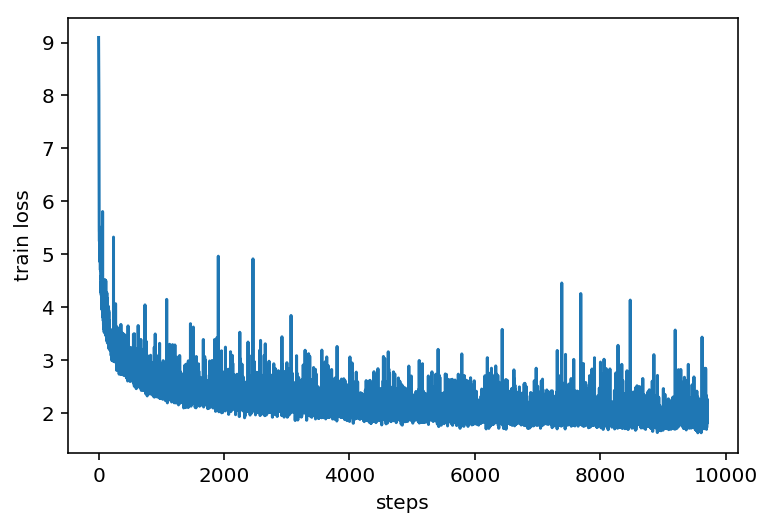

In [8]:
plt.plot(history['train_loss'])
plt.xlabel('steps')
plt.ylabel('train loss')

<a id='step3'></a>
## Step 3: (可选）验证你的模型

为了评估潜在的过度拟合，可以选择评估验证集的性能。如果你决定来做这个**可选**任务，则需要先完成下一个notebook中的所有步骤（**3_Inference.ipynb**）。作为该notebook的一部分，你需要编写并测试使用RNN解码器生成图像标注的代码（特别是`DecoderRNN`类中的`sample`方法）。在这里，该代码会是非常有用的。

如果你决定验证模型，请不要在**data_loader.py**中编辑数据加载器。相反，你需要创建一个名为**data_loader_val.py**的新文件，其中包含用于获取验证数据的数据加载器的代码。你可以访问：
-  路径为`'/opt/cocoapi/images/train2014/'`的验证图像文件
-  路径为`'/opt/cocoapi/annotations/captions_val2014.json'`的文件中 ，用于验证图像标注的注释文件。

根据我们的建议，验证模型的方法涉及会到创建一个json文件，例如包含模型预测的验证图像的标注的[这个文件](https://github.com/cocodataset/cocoapi/blob/master/results/captions_val2014_fakecap_results.json) 。然后，你可以编写自己的脚本或使用 [在线查找](https://github.com/tylin/coco-caption) 的脚本来计算模型的BLEU分数。你可以在 [本文](https://arxiv.org/pdf/1411.4555.pdf)第4.1节中阅读有关BLEU分数以及其他评估指标（如TEOR和Cider）的更多信息。有关如何使用注释文件的更多信息，请查看COCO数据集 [网站](http://cocodataset.org/#download) 。